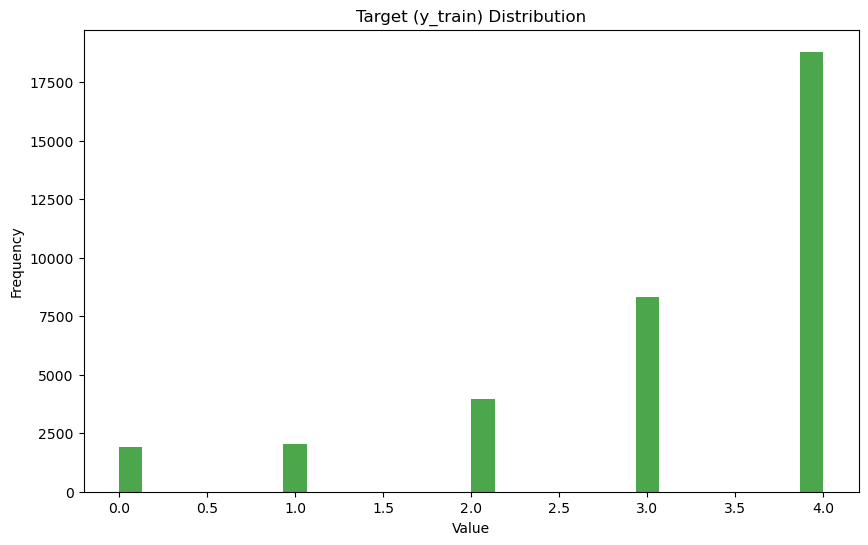

Initial weights:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
epoch:
0
Loss:
1.9250374819380567
epoch:
1
Loss:
1.3538863411132775
epoch:
2
Loss:
1.1624748196929797
epoch:
3
Loss:
1.1015626910329384
epoch:
4
Loss:
1.0781239115236405
epoch:
5
Loss:
1.0656043441249194
epoch:
6
Loss:
1.0566359412382567
epoch:
7
Loss:
1.0490185126162925
epoch:
8
Loss:
1.0424551505609083
epoch:
9
Loss:
1.036621273263833
epoch:
10
Loss:
1.0311775982355906
epoch:
11
Loss:
1.0263479259951156
epoch:
12
Loss:
1.0219385228681408
epoch:
13
Loss:
1.0179154291124248
epoch:
14
Loss:
1.0142893201285283
epoch:
15
Loss:
1.0108660375343823
epoch:
16
Loss:
1.0076280020748967
epoch:
1

epoch:
221
Loss:
0.9402433152413219
epoch:
222
Loss:
0.9402015439018012
epoch:
223
Loss:
0.940184444534725
epoch:
224
Loss:
0.940133469729934
epoch:
225
Loss:
0.9401229305751464
epoch:
226
Loss:
0.9401099195355824
epoch:
227
Loss:
0.9401054567913731
epoch:
228
Loss:
0.9400989648539608
epoch:
229
Loss:
0.9401040318239835
epoch:
230
Loss:
0.9401357336497014
epoch:
231
Loss:
0.9400975653524527
epoch:
232
Loss:
0.9400895869764777
epoch:
233
Loss:
0.94003390773961
epoch:
234
Loss:
0.9400283035900131
epoch:
235
Loss:
0.9400280794193684
epoch:
236
Loss:
0.9400170382502612
epoch:
237
Loss:
0.9399946376404419
epoch:
238
Loss:
0.9400763390701287
epoch:
239
Loss:
0.9400314824737456
epoch:
240
Loss:
0.9399783889377036
epoch:
241
Loss:
0.9399883739567074
epoch:
242
Loss:
0.940000402462465
epoch:
243
Loss:
0.9399450995709882
epoch:
244
Loss:
0.9399297580813016
epoch:
245
Loss:
0.9400296290017053
epoch:
246
Loss:
0.9399175633605295
epoch:
247
Loss:
0.9399468448363094
epoch:
248
Loss:
0.93993085665146

epoch:
456
Loss:
0.9394327819009467
epoch:
457
Loss:
0.9393442235910364
epoch:
458
Loss:
0.9393407600583085
epoch:
459
Loss:
0.9395308981553129
epoch:
460
Loss:
0.9393446636053142
epoch:
461
Loss:
0.9393502239008388
epoch:
462
Loss:
0.9393708154171787
epoch:
463
Loss:
0.9393551374407851
epoch:
464
Loss:
0.9393406530749006
epoch:
465
Loss:
0.939344998165509
epoch:
466
Loss:
0.9393880807916332
epoch:
467
Loss:
0.9393658888802211
epoch:
468
Loss:
0.9393737795051138
epoch:
469
Loss:
0.9394491981540671
epoch:
470
Loss:
0.9393385021250213
epoch:
471
Loss:
0.9393916515240024
epoch:
472
Loss:
0.9393349405200855
epoch:
473
Loss:
0.9393544829064029
epoch:
474
Loss:
0.9393391343796805
epoch:
475
Loss:
0.9393642137148308
epoch:
476
Loss:
0.9393554293259803
epoch:
477
Loss:
0.9393684128054918
epoch:
478
Loss:
0.9393485228241825
epoch:
479
Loss:
0.9395536712368205
epoch:
480
Loss:
0.9393369237449908
epoch:
481
Loss:
0.9393355639197667
epoch:
482
Loss:
0.9394027470917071
epoch:
483
Loss:
0.9393598098

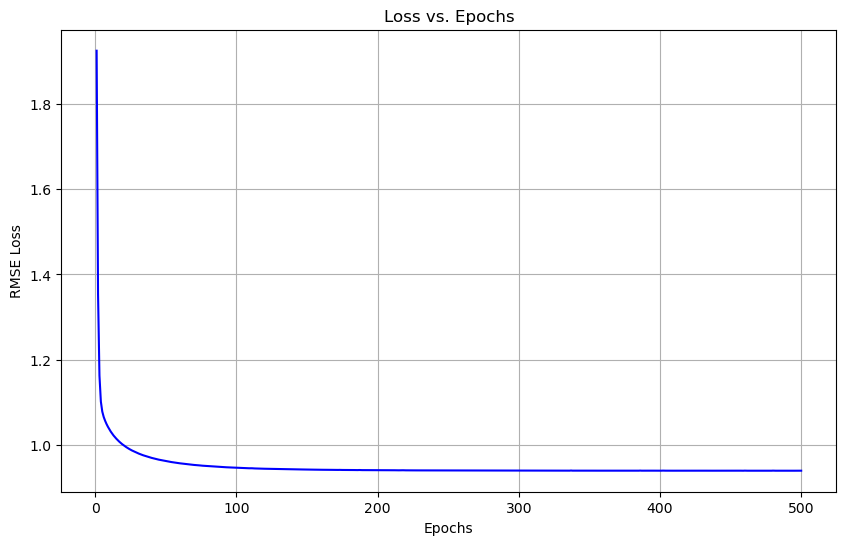

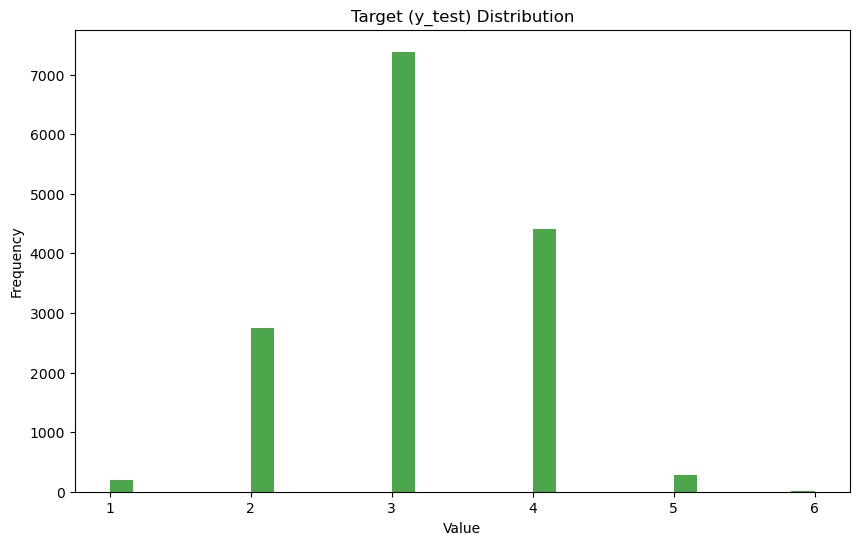

(14996, 2)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(2024)

class LinearRegressionBatchGD:
    def __init__(self, learning_rate=0.9, max_epochs=15000, batch_size=450):
        '''
        Initializing the parameters of the model

        Args:
          learning_rate : learning rate for batch gradient descent
          max_epochs : maximum number of epochs that the batch gradient descent algorithm will run for
          batch_size : size of the batches used for batch gradient descent.

        Returns:
          None
        '''
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.weights = None

    def fit(self, X, y, plot=True):
        '''
        This function is used to train the model using batch gradient descent.

        Args:
          X : 2D numpy array of training set data points. Dimensions (n x (d+1))
          y : 2D numpy array of target values in the training dataset. Dimensions (n x 1)

        Returns :
          None
        '''
        if self.batch_size is None:
            self.batch_size = X.shape[0]  # Set batch size to the number of data points if not provided

        # Initialize the weights
        self.weights = np.zeros((X.shape[1], 1))
        print("Initial weights:")
        print(self.weights)
        prev_weights = np.copy(self.weights)
        prev_loss=0.000000000
        self.error_list = []  # Stores the loss for every epoch

        for epoch in range(self.max_epochs):
            
            batches = create_batches(X, y, self.batch_size)
            for X_batch, y_batch in batches:
                dw = self.compute_gradient(X_batch, y_batch, self.weights)

                self.weights -= self.learning_rate * dw

            loss = self.compute_rmse_loss(X, y, self.weights)
            self.error_list.append(loss)

            
            print("epoch:" )
            print(epoch)
            print("Loss:")
            print(loss)
            if np.linalg.norm(self.weights - prev_weights) < 1e-15:
                print("Convergence achieved.")
                break
            elif np.linalg.norm(loss - prev_loss) < 1e-19:
              print("loss is minimum.")
              break
            prev_weights = np.copy(self.weights)
            prev_loss=np.copy(loss)
        if plot:
            plot_loss(self.error_list, epoch + 1)

    def predict(self, X):
        '''
        This function is used to predict the target values for the given set of feature values

        Args:
          X: 2D numpy array of data points. Dimensions (n x (d+1))

        Returns:
          2D numpy array of predicted target values. Dimensions (n x 1)
        '''
        
        
        predictions = np.dot(X, self.weights)
        return predictions

    def compute_rmse_loss(self, X, y, weights):
        '''
        This function computes the Root Mean Square Error (RMSE)

        Args:
          X : 2D numpy array of data points. Dimensions (n x (d+1))
          y : 2D numpy array of target values. Dimensions (n x 1)
          weights : 2D numpy array of weights of the model. Dimensions ((d+1) x 1)
        
        
        '''
        
        predictions = np.dot(X, weights)        
        mse = np.mean((predictions - y) ** 2)        
        rmse = np.sqrt(mse)
        return rmse

    def compute_gradient(self, X, y, weights):
        '''
        This function computes the gradient of mean squared-error loss w.r.t the weights

        Args:
          X : 2D numpy array of data points. Dimensions (n x (d+1))
          y : 2D numpy array of target values. Dimensions (n x 1)
          weights : 2D numpy array of weights of the model. Dimensions ((d+1) x 1)

        Returns:
          dw : 2D numpy array of gradients w.r.t weights. Dimensions ((d+1) x 1)
        '''
        
        n = X.shape[0]     
        predictions = np.dot(X, weights)
        error = predictions - y
        dw = (1 / n) * np.dot(X.T, error)
        
        return dw

def plot_loss(error_list, total_epochs):
    '''
    This function plots the loss for each epoch.

    Args:
      error_list : list of validation loss for each epoch
      total_epochs : Total number of epochs
    Returns:
      None
    '''
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, total_epochs + 1), error_list, color='b')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE Loss')
    plt.title('Loss vs. Epochs')
    plt.grid(True)
    plt.show()

def plot_learned_equation(X, y, y_hat):
    '''
    This function generates the plot to visualize how well the learned linear equation fits the dataset  

    Args:
      X : 2D numpy array of data points. Dimensions (n x 2)
      y : 2D numpy array of target values. Dimensions (n x 1)
      y_hat : 2D numpy array of predicted values. Dimensions (n x 1)

    Returns:
      None
    '''
   

def generate_toy_dataset():
    '''
    This function generates a simple toy dataset containing 300 points with 1d feature 
    '''
    data = pd.read_csv('train.csv')
    
   
    X = data.iloc[:, 1:65].values  
    y = data.iloc[:, 65].values   
    
    
    X_train = X
    y_train = y
    y_train = y_train.reshape(-1, 1)
      # # Histogram 
    plt.figure(figsize=(10, 6))
    plt.hist(y_train, bins=30, alpha=0.7, color='green')
    plt.title('Target (y_train) Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
    
    #   ###############for test data
    data = pd.read_csv('test.csv')
    
    
    X_test_index=data.iloc[:, 0].values 
    X_test_index = X_test_index.reshape(-1, 1)
    X_test = data.iloc[:, 1:65].values  # Extract features (skipping the ID column)
    
    return X_train, y_train, X_test,X_test_index

def create_batches(X, y, batch_size):
    '''
    This function is used to create the batches of randomly selected data points.

    Args:
      X : 2D numpy array of data points. Dimensions (n x (d+1))
      y : 2D numpy array of target values. Dimensions (n x 1)

    Returns:
      batches : list of tuples with each tuple of size batch size.
    '''
    batches = []  
    
   
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    # Combine feature matrix X and target vector y into a single array
    data = np.hstack((X, y))
    np.random.shuffle(data)  
    num_batches = data.shape[0] // batch_size
    i=0
    for i in range(num_batches+1):
      if i<num_batches:  
        batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_batch = batch[:, :-1]
        Y_batch = batch[:, -1].reshape((-1, 1))
        batches.append((X_batch, Y_batch))
      if data.shape[0] % batch_size != 0 and i==num_batches:
        batch = data[i * batch_size:data.shape[0]]
        X_batch = batch[:, :-1]
        Y_batch = batch[:, -1].reshape((-1, 1))
        batches.append((X_batch, Y_batch))
    
    return batches

# Terminal text coloring
RESET = '\033[0m'
GREEN = '\033[32m'
RED = '\033[31m'
if __name__ == '__main__':
    
    X_train, y_train, X_test,X_test_index= generate_toy_dataset()


    # bias 
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

   
    model = LinearRegressionBatchGD(learning_rate=0.01, max_epochs=500, batch_size=500)
    model.fit(X_train, y_train, plot=True)

    # Predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    y_hat_test_rounded = np.round(y_hat_test).astype(int)
      # Histogram for y_train
    plt.figure(figsize=(10, 6))
    plt.hist(y_hat_test_rounded, bins=30, alpha=0.7, color='green')
    plt.title('Target (y_test) Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
    data_j = np.hstack((X_test_index, y_hat_test_rounded))
    if data_j is None or data_j.size == 0:
        print("Data is not available for saving.")
    else:
        print(data_j.shape)
        np.savetxt('kaggle.csv', data_j, delimiter=',', header='ID,Score', comments='')

    plot_learned_equation(X_train, y_train, y_hat_train)

In [2]:
nl = pd.read_csv('kaggle.csv')

In [3]:
nl

,ID,Score
0,34988.0,4.0
1,34989.0,3.0
2,34990.0,3.0
3,34991.0,3.0
4,34992.0,3.0
...,...,...
14991,49979.0,3.0
14992,49980.0,4.0
14993,49981.0,4.0
14994,49982.0,3.0


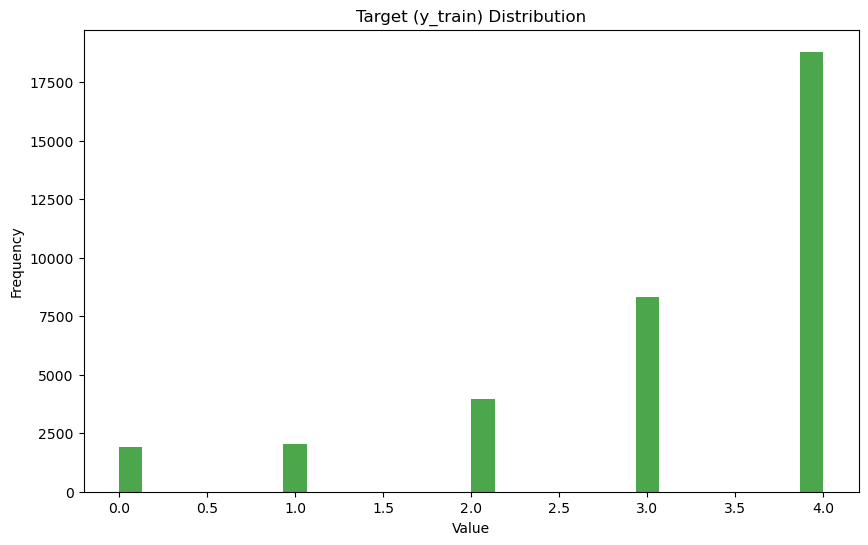

Epoch 1/500, Loss: 1.036994
Epoch 2/500, Loss: 1.000447
Epoch 3/500, Loss: 0.982396
Epoch 4/500, Loss: 0.969733
Epoch 5/500, Loss: 0.962550
Epoch 6/500, Loss: 0.957224
Epoch 7/500, Loss: 0.955438
Epoch 8/500, Loss: 0.950425
Epoch 9/500, Loss: 0.948791
Epoch 10/500, Loss: 0.946324
Epoch 11/500, Loss: 0.945567
Epoch 12/500, Loss: 0.944498
Epoch 13/500, Loss: 0.943405
Epoch 14/500, Loss: 0.942699
Epoch 15/500, Loss: 0.944836
Epoch 16/500, Loss: 0.942105
Epoch 17/500, Loss: 0.941839
Epoch 18/500, Loss: 0.941820
Epoch 19/500, Loss: 0.941842
Epoch 20/500, Loss: 0.940635
Epoch 21/500, Loss: 0.940428
Epoch 22/500, Loss: 0.940599
Epoch 23/500, Loss: 0.940415
Epoch 24/500, Loss: 0.940221
Epoch 25/500, Loss: 0.940240
Epoch 26/500, Loss: 0.940292
Epoch 27/500, Loss: 0.941552
Epoch 28/500, Loss: 0.940211
Epoch 29/500, Loss: 0.939892
Epoch 30/500, Loss: 0.942492
Epoch 31/500, Loss: 0.939763
Epoch 32/500, Loss: 0.941559
Epoch 33/500, Loss: 0.939971
Epoch 34/500, Loss: 0.940260
Epoch 35/500, Loss: 0.9

Epoch 280/500, Loss: 0.941138
Epoch 281/500, Loss: 0.939859
Epoch 282/500, Loss: 0.940603
Epoch 283/500, Loss: 0.939776
Epoch 284/500, Loss: 0.939877
Epoch 285/500, Loss: 0.939365
Epoch 286/500, Loss: 0.940764
Epoch 287/500, Loss: 0.939756
Epoch 288/500, Loss: 0.940138
Epoch 289/500, Loss: 0.939751
Epoch 290/500, Loss: 0.941857
Epoch 291/500, Loss: 0.939516
Epoch 292/500, Loss: 0.939693
Epoch 293/500, Loss: 0.940056
Epoch 294/500, Loss: 0.939551
Epoch 295/500, Loss: 0.939828
Epoch 296/500, Loss: 0.940304
Epoch 297/500, Loss: 0.940659
Epoch 298/500, Loss: 0.943998
Epoch 299/500, Loss: 0.939946
Epoch 300/500, Loss: 0.939585
Epoch 301/500, Loss: 0.939977
Epoch 302/500, Loss: 0.939570
Epoch 303/500, Loss: 0.940605
Epoch 304/500, Loss: 0.939490
Epoch 305/500, Loss: 0.939611
Epoch 306/500, Loss: 0.940543
Epoch 307/500, Loss: 0.939579
Epoch 308/500, Loss: 0.941234
Epoch 309/500, Loss: 0.941511
Epoch 310/500, Loss: 0.940044
Epoch 311/500, Loss: 0.939801
Epoch 312/500, Loss: 0.940015
Epoch 313/

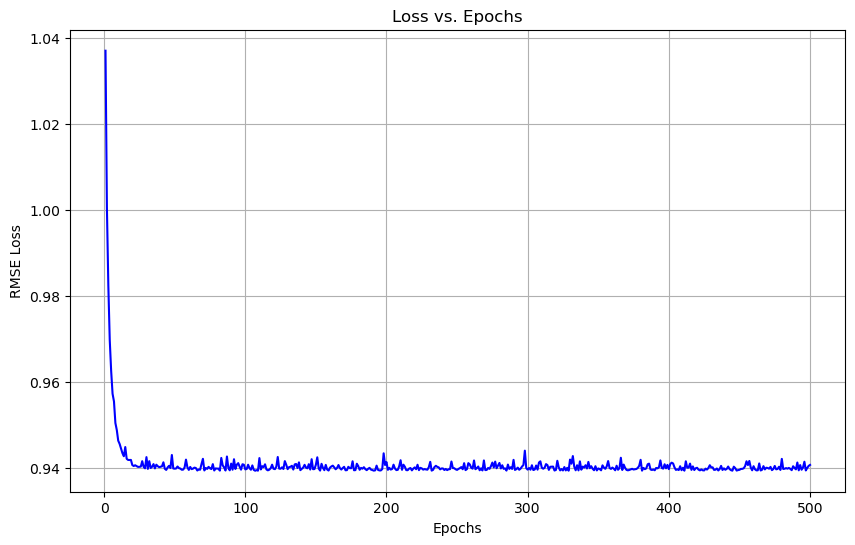

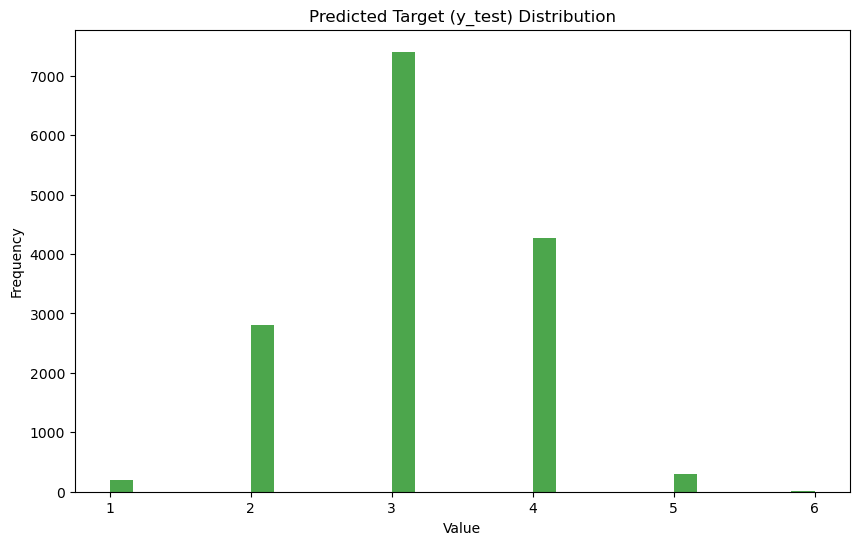

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(2024)

class LinearRegressionBatchGD:
    def __init__(self, learning_rate=0.1, max_epochs=1500, batch_size=150, tolerance=1e-3):
        '''
        Initializes the parameters of the model.

        Args:
          learning_rate : learning rate for batch gradient descent
          max_epochs : maximum number of epochs that the batch gradient descent algorithm will run for
          batch_size : size of the batches used for batch gradient descent.
          tolerance : threshold for early stopping to avoid unnecessary iterations

        Returns:
          None
        '''
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.tolerance = tolerance
        self.weights = None

    def fit(self, X, y, plot=True):
        '''
        Trains the model using batch gradient descent.

        Args:
          X : 2D numpy array of training set data points. Dimensions (n x d)
          y : 2D numpy array of target values in the training dataset. Dimensions (n x 1)
          plot : Boolean flag to indicate whether to plot the loss over epochs

        Returns:
          None
        '''
        n_samples, n_features = X.shape

        # Initialize weights to small random values for better performance
        self.weights = np.random.randn(n_features, 1) * 0.01
        prev_weights = np.copy(self.weights)
        self.error_list = []  # Store the loss for each epoch

        for epoch in range(self.max_epochs):
            batches = self._create_batches(X, y, self.batch_size)
            
            for X_batch, y_batch in batches:
                dw = self._compute_gradient(X_batch, y_batch, self.weights)
                self.weights -= self.learning_rate * dw

            loss = self._compute_rmse_loss(X, y)
            self.error_list.append(loss)
            print(f"Epoch {epoch + 1}/{self.max_epochs}, Loss: {loss:.6f}")

            # Check for convergence
            if np.linalg.norm(self.weights - prev_weights) < self.tolerance:
                print("Convergence achieved.")
                break

            prev_weights = np.copy(self.weights)

        if plot:
            self._plot_loss(self.error_list, epoch + 1)

    def predict(self, X):
        '''
        Predicts the target values for the given set of feature values.

        Args:
          X: 2D numpy array of data points. Dimensions (n x d)

        Returns:
          2D numpy array of predicted target values. Dimensions (n x 1)
        '''
        return np.dot(X, self.weights)

    def _compute_rmse_loss(self, X, y):
        '''
        Computes the Root Mean Square Error (RMSE).

        Args:
          X : 2D numpy array of data points. Dimensions (n x d)
          y : 2D numpy array of target values. Dimensions (n x 1)

        Returns:
          rmse : Root Mean Square Error
        '''
        predictions = self.predict(X)
        mse = np.mean((predictions - y) ** 2)
        rmse = np.sqrt(mse)
        return rmse

    def _compute_gradient(self, X, y, weights):
        '''
        Computes the gradient of the mean squared error loss with respect to the weights.

        Args:
          X : 2D numpy array of data points. Dimensions (n x d)
          y : 2D numpy array of target values. Dimensions (n x 1)
          weights : 2D numpy array of weights of the model. Dimensions (d x 1)

        Returns:
          dw : 2D numpy array of gradients w.r.t weights. Dimensions (d x 1)
        '''
        n_samples = X.shape[0]
        predictions = np.dot(X, weights)
        error = predictions - y
        dw = (1 / n_samples) * np.dot(X.T, error)
        return dw

    def _create_batches(self, X, y, batch_size):
        '''
        Creates batches of randomly selected data points.

        Args:
          X : 2D numpy array of data points. Dimensions (n x d)
          y : 2D numpy array of target values. Dimensions (n x 1)

        Returns:
          batches : list of tuples with each tuple of size batch_size
        '''
        data = np.hstack((X, y))
        np.random.shuffle(data)  
        num_batches = int(np.ceil(data.shape[0] / batch_size))
        batches = [(data[i * batch_size:(i + 1) * batch_size, :-1], data[i * batch_size:(i + 1) * batch_size, -1].reshape(-1, 1)) 
                   for i in range(num_batches)]
        return batches

    def _plot_loss(self, error_list, total_epochs):
        '''
        Plots the loss for each epoch.

        Args:
          error_list : list of validation loss for each epoch
          total_epochs : Total number of epochs
        Returns:
          None
        '''
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, total_epochs + 1), error_list, color='b')
        plt.xlabel('Epochs')
        plt.ylabel('RMSE Loss')
        plt.title('Loss vs. Epochs')
        plt.grid(True)
        plt.show()


def generate_toy_dataset():
    '''
    Generates a simple toy dataset containing 300 points with multiple features
    '''
    data = pd.read_csv('train.csv')
    X = data.iloc[:, 1:65].values  
    y = data.iloc[:, 65].values   
    y = y.reshape(-1, 1)

    # Plot target distribution
    plt.figure(figsize=(10, 6))
    plt.hist(y, bins=30, alpha=0.7, color='green')
    plt.title('Target (y_train) Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
    data_test = pd.read_csv('test.csv')
    X_test_index = data_test.iloc[:, 0].values.reshape(-1, 1)
    X_test = data_test.iloc[:, 1:65].values

    return X, y, X_test, X_test_index


if __name__ == '__main__':
    X_train, y_train, X_test, X_test_index = generate_toy_dataset()

    # Add bias term to training and test data
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # Train the model
    model = LinearRegressionBatchGD(learning_rate=0.01, max_epochs=500, batch_size=50, tolerance=1e-6)
    model.fit(X_train, y_train, plot=True)

    # Make predictions on training and test data
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    y_hat_test_rounded = np.round(y_hat_test).astype(int)

    # Plot test data predictions distribution
    plt.figure(figsize=(10, 6))
    plt.hist(y_hat_test_rounded, bins=30, alpha=0.7, color='green')
    plt.title('Predicted Target (y_test) Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    # Save predictions to CSV
    data_j = np.hstack((X_test_index, y_hat_test_rounded))
    if data_j.size != 0:
        np.savetxt('kaggle.csv', data_j, delimiter=',', header='ID,Score', comments='')



In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV, train_test_split

# Custom Linear Regression Class
class LinearRegressionBatchGD:
    def __init__(self, learning_rate=0.01, max_epochs=500, batch_size=50, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.tolerance = tolerance
        self.weights = None

    def fit(self, X, y, plot=False):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        prev_weights = np.copy(self.weights)
        prev_loss = float('inf')
        self.error_list = []

        for epoch in range(self.max_epochs):
            for X_batch, y_batch in self._create_batches(X, y):
                gradients = self._compute_gradient(X_batch, y_batch)
                self.weights -= self.learning_rate * gradients

            loss = self._compute_rmse_loss(X, y)
            self.error_list.append(loss)

            if np.linalg.norm(self.weights - prev_weights) < self.tolerance:
                print(f"Convergence achieved at epoch {epoch}.")
                break

            prev_weights = np.copy(self.weights)
            prev_loss = loss

        if plot:
            self._plot_loss()

    def predict(self, X):
        return np.dot(X, self.weights)

    def _compute_rmse_loss(self, X, y):
        predictions = np.dot(X, self.weights)
        mse = np.mean((predictions - y) ** 2)
        return np.sqrt(mse)

    def _compute_gradient(self, X, y):
        predictions = np.dot(X, self.weights)
        errors = predictions - y
        return (1 / X.shape[0]) * np.dot(X.T, errors)

    def _create_batches(self, X, y):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for start in range(0, X.shape[0], self.batch_size):
            end = min(start + self.batch_size, X.shape[0])
            yield X[indices[start:end]], y[indices[start:end]]

    def _plot_loss(self):
        plt.plot(range(1, len(self.error_list) + 1), self.error_list, 'b-')
        plt.xlabel('Epochs')
        plt.ylabel('RMSE Loss')
        plt.title('Loss vs. Epochs')
        plt.grid(True)
        plt.show()

# Wrapper for sklearn compatibility
class LinearRegressionBatchGDWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.01, max_epochs=500, batch_size=50, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.tolerance = tolerance

    def fit(self, X, y):
        self.model = LinearRegressionBatchGD(
            learning_rate=self.learning_rate,
            max_epochs=self.max_epochs,
            batch_size=self.batch_size,
            tolerance=self.tolerance
        )
        self.model.fit(X, y, plot=False)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        predictions = self.predict(X)
        rmse = np.sqrt(np.mean((predictions - y) ** 2))
        return -rmse  # Negative RMSE for maximization in GridSearchCV

# Generating synthetic dataset for demonstration (replace with your data loading logic)
def generate_toy_dataset():
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')

    X_train = train_data.iloc[:, 1:-1].values
    y_train = train_data.iloc[:, -1].values.reshape(-1, 1)

    X_test = test_data.iloc[:, 1:].values
    test_ids = test_data.iloc[:, 0].values

    return X_train, y_train, X_test, test_ids

# Hyperparameter tuning with GridSearchCV
def perform_grid_search(X_train, y_train):
    param_grid = {
        'learning_rate': [0.0001,0.001, 0.01, 0.1],
        'max_epochs': [100, 500, 1000,1500],
        'batch_size': [50, 100, 200,150],
        'tolerance': [1e-4, 1e-6, 1e-8, 1e-11]
    }

    grid_search = GridSearchCV(
        estimator=LinearRegressionBatchGDWrapper(),
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_

if __name__ == '__main__':
    X_train, y_train, X_test, test_ids = generate_toy_dataset()

    # Add bias term to the training and test sets
    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # Split data into training and validation sets for grid search
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train, y_train, test_size=0.2, random_state=2024
    )

    # Perform Grid Search to find the best hyperparameters
    best_params, best_score = perform_grid_search(X_train_split, y_train_split)
    print(f"Best Parameters: {best_params}")
    print(f"Best RMSE (negative): {-best_score}")

    # Train the final model with the best hyperparameters
    best_model = LinearRegressionBatchGDWrapper(**best_params)
    best_model.fit(X_train_split, y_train_split)

    # Predict on validation set and calculate RMSE
    y_pred_val = best_model.predict(X_val_split)
    rmse_val = np.sqrt(np.mean((y_pred_val - y_val_split) ** 2))
    print(f"Validation RMSE: {rmse_val:.4f}")

    # Predict on the test set
    y_pred_test = best_model.predict(X_test)
    y_pred_test_rounded = np.round(y_pred_test).astype(int)

    # Save predictions to CSV
    predictions_df = pd.DataFrame({
        'ID': test_ids,
        'Score': y_pred_test_rounded.flatten()
    })
    predictions_df.to_csv('kaggle.csv', index=False)
    print("Predictions saved to 'kaggle.csv'.")


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'batch_size': 50, 'learning_rate': 0.001, 'max_epochs': 1000, 'tolerance': 0.0001}
Best RMSE (negative): 0.8861225065892183
Validation RMSE: 0.9418
Predictions saved to 'kaggle.csv'.
